In [1]:
from abc import ABC, abstractmethod
from random import shuffle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class CardABC(ABC):

    @abstractmethod
    def __repr__(self):
        pass
    
    @abstractmethod
    def value(self):
        pass



class DeckABC(ABC):

    @abstractmethod
    def create_deck(self):
        pass
    
    @abstractmethod
    def shuffle(self, deck):
        pass



class Card(CardABC):

    suits = {"♠", "♦", "♣", "♥"}
    ranks = {"2", "3", "4", "5", "6", "7", "8", "9", "10", "J", "Q", "K", "A"}

    def __init__(self, suit, rank):
        super().__init__()
        self.rank = rank
        self.suit = suit
        self.suits = []
        self.ranks = []
        
    def __repr__(self):
        return f"{self.rank} of {self.suit}"

    def value(self):
        return None, None



class FaceCard(Card):

    # ranks = {"J", "Q", "K"}

    def __init__(self, suit, rank):
        super().__init__(suit, rank)
        self.soft = 10
        self.hard = 10
        self.suit = suit
        self.rank = rank
        self.ranks.append(self.rank)
        self.suits.append(self.suit)
    
    def value(self):
        return self.soft, self.hard



class AceCard(Card):

    # ranks = {"A"}

    def __init__(self, suit, rank):
        super().__init__(suit, rank)
        self.soft = 1
        self.hard = 11
        self.suit = suit
        self.rank = rank
        self.ranks.append(self.rank)
        self.suits.append(self.suit)

    def value(self):
        return self.soft, self.hard



class NumCard(Card):

    # ranks = {"2", "3", "4", "5", "6", "7", "8", "9", "10"}

    def __init__(self, suit, rank):
        super().__init__(suit, rank)
        self.hard = int(self.rank)
        self.soft = int(self.rank)
        self.suit = suit
        self.rank = rank
        self.ranks.append(self.rank)
        self.suits.append(self.suit)

    def value(self):
        return self.soft, self.hard



class Deck(DeckABC):
    def __init__(self):
        super().__init__()
        self.deck = []
        self.create_deck()
        self.shuffle(deck=self.deck)

    def __len__(self):
        return len(self.deck)

    def deal(self):
        return self.deck.pop()

    def create_deck(self):
        suits = {"♠", "♦", "♣", "♥"}
        
        for suit in suits:
            for rank in range(2, 11):
                numCard = NumCard(suit, str(rank))
                self.deck.append((str(rank), suit, numCard))
            for rank in {"J", "Q", "K"}:
                faceCard = FaceCard(suit, rank)
                self.deck.append((rank, suit, faceCard))
            aceCard = AceCard(suit, "A")
            self.deck.append(("A", suit, aceCard))

    @staticmethod
    def shuffle(deck):
        shuffle(deck)



class Player(object):
    def __init__(self, name):
        super().__init__()
        self.name = name
        self.hand = []
        self.win = None
        self.soft = None
        self.hard = None
    
    def __repr__(self):
        representation = self.name + ":  |  "
        for card in self.hand:
            representation += card[2].__repr__() + "  |  "    
        return representation

In [3]:
class Game():
    def __init__(self, deck):
        super().__init__()
        self.deck = deck
        self.dealer = Player("Dealer")
        self.user = Player("Player")
        self.result_user = 0
        self.result_dealer = 0

    def initial_deal(self):
        for i in range(2):
            self.dealer.hand.append(self.deck.pop())
            self.user.hand.append(self.deck.pop())
        self.dealer.soft, self.dealer.hard = self.check_hand(self.dealer.hand)
        self.user.soft, self.user.hard = self.check_hand(self.user.hand)

    def check_hand(self, hand):
        soft_sum = 0
        hard_sum = 0
        for h in hand:
            values = h[2].value()
            soft_sum += values[0]
            hard_sum += values[1]
        return [soft_sum, hard_sum]

    def ask_user(self, parametre):
        if self.user.soft <= parametre:
            self.user.hand.append(self.deck.pop())
            self.user.soft, self.user.hard = self.check_hand(self.user.hand)
            self.ask_user(parametre=parametre)
        else:
            if self.user.soft > 21:
                self.result_user = self.user.soft
            else:
                self.result_user = self.user.soft if self.user.hard > 21 else max(self.user.soft, self.user.hard)
                
    def ask_dealer(self):
        if self.dealer.soft <= 16:
            self.dealer.hand.append(self.deck.pop())
            self.dealer.soft, self.dealer.hard = self.check_hand(self.dealer.hand)
            self.ask_dealer()
        else:
            if self.dealer.soft > 21:
                self.result_dealer = self.dealer.soft
            else:
                self.result_dealer = self.dealer.soft if self.dealer.hard > 21 else max(self.dealer.soft, self.dealer.hard)
        
    def final_result(self):
        if self.result_user > 21:
            return 3
        elif self.result_user < 21 and self.result_dealer > 21:
            return 2
        else:
            if self.result_user < self.result_dealer:
                return 1
            else:
                return 0

1. Write a function that takes an integer argument between 1 and 20 included, and simulates a game between the player and the dealer. If the sum of the player's cards is less than or equal the parameter, player takes another card, otherwise the player passes. The function returns the game result, one of the following

{

    0: "win_points", # player wins by points, ex. player 19 dealer 18
    
    1: "loss_points", # player loses by points, ex. player 17 dealer 18
    
    2: "win_bust", #player wins when dealer busts, ex. player 19 dealer 25
    
    3:"loss_bust" #player loses when player busts, ex. player 25 dealer 19
}

In [9]:
def simulate(parametre):
    result = []
    for i in range(0, 10000):
        dec = Deck()
        game = Game(dec.deck)
        game.initial_deal()
        game.ask_user(parametre=parametre)
        game.ask_dealer()
        a = game.final_result()
        result.append(a)
    return result

2. Simulate the game 10000 times for each parameter, and store the results in dictionary result_dict = {"param_1": [], "param_2": [], ...,  "param_20": []}, where the elements of the lists are the simulation results (0,1,2, or 3)

In [10]:
def main():
    result_dict = {}
    for i in range(1, 21):
        result = simulate(parametre=i)
        result_dict[i] = result
    return result_dict

In [11]:
result_dict = main()

3. Create results_df pandas.DataFrame for result_dict

In [12]:
results_df = pd.DataFrame(data=result_dict)

In [13]:
results_df.head(10)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,1,0,0,1,0,1,2,1,2,2,2,2,0,0,1,0,3,2,3,3
1,1,2,1,1,1,2,1,1,0,1,1,1,0,2,0,2,3,0,3,0
2,1,2,2,1,1,2,1,1,2,1,1,1,0,2,1,1,1,0,3,3
3,1,1,2,1,1,2,1,1,1,1,2,1,1,1,3,3,1,3,1,3
4,2,0,1,1,2,2,2,1,0,1,2,2,1,2,1,3,0,3,3,0
5,2,1,2,2,1,0,1,2,1,1,2,1,1,2,3,1,3,3,3,3
6,1,2,1,1,2,0,0,1,2,1,1,2,1,1,0,0,0,3,3,3
7,0,1,2,1,2,1,1,2,1,2,1,1,2,1,3,3,3,2,3,0
8,2,1,1,1,2,1,0,2,2,1,0,0,1,1,3,2,0,3,3,3
9,0,1,1,1,1,2,0,2,2,1,2,0,2,1,0,0,3,2,3,3


In [16]:
for i in range(1, 21):
    print(results_df[i].value_counts().sort_index(ascending = True).to_frame(), "\n")

      1
0  1522
1  5501
2  2977 

      2
0  1436
1  5582
2  2982 

      3
0  1531
1  5442
2  3027 

      4
0  1509
1  5457
2  3034 

      5
0  1538
1  5514
2  2948 

      6
0  1563
1  5468
2  2969 

      7
0  1552
1  5471
2  2977 

      8
0  1603
1  5433
2  2964 

      9
0  1704
1  5371
2  2925 

     10
0  1725
1  5250
2  3025 

     11
0  1753
1  5193
2  3054 

     12
0  1879
1  4765
2  2969
3   387 

     13
0  2103
1  4336
2  2684
3   877 

     14
0  2470
1  3607
2  2460
3  1463 

     15
0  2538
1  2961
2  2200
3  2301 

     16
0  2837
1  2156
2  1895
3  3112 

     17
0  2911
1  1459
2  1490
3  4140 

     18
0  2645
1   896
2  1108
3  5351 

     19
0  2112
1   616
2   625
3  6647 

     20
0   968
1   445
3  8587 



<ipython-input-43-59cca16dbbf9>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  results_df.hist(ax=ax)


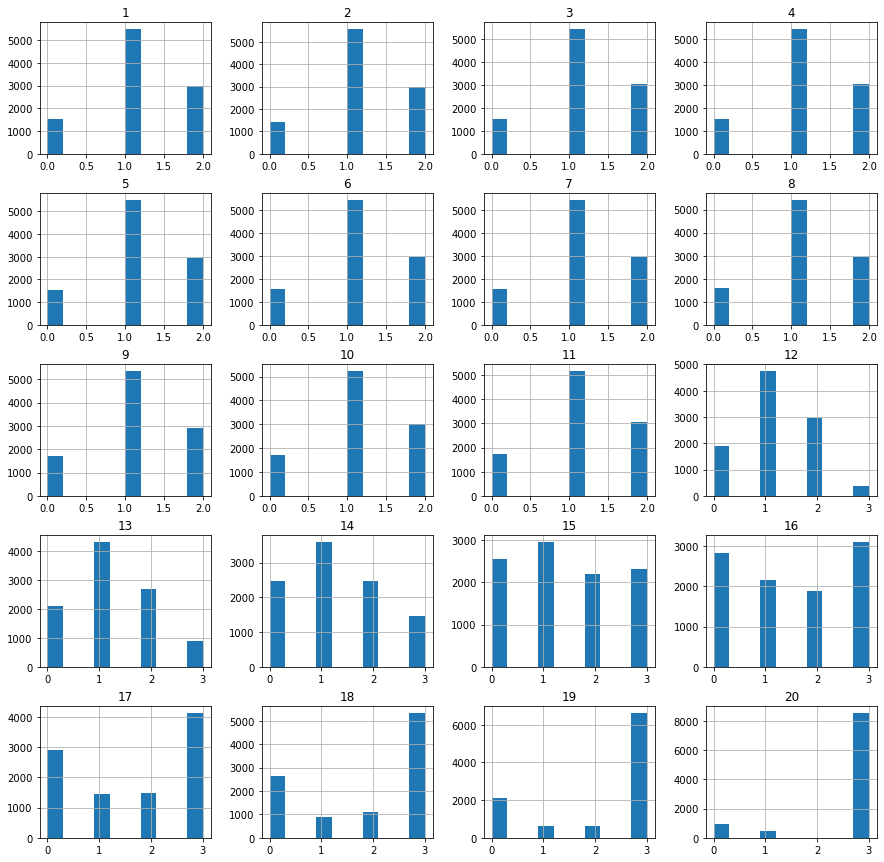

In [43]:
fig = plt.figure(figsize = (15, 15))
ax = fig.gca()
results_df.hist(ax=ax)
plt.show()

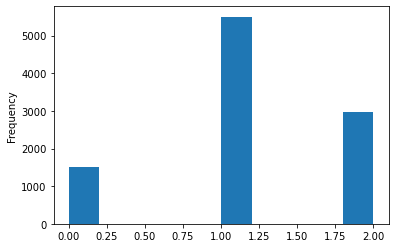

In [18]:
results_df[1].plot(kind="hist");

In [19]:
data = { 0: [], 1:[], 2:[], 3:[]}
    
for i in range(1,21):
    a = results_df[i].value_counts()
    data[0].append(a[0] if 0 in a else 0)
    data[1].append(a[1] if 1 in a else 0)
    data[2].append(a[2] if 2 in a else 0)
    data[3].append(a[3] if 3 in a else 0)

In [20]:
results_df_2 = pd.DataFrame(data = data)

In [22]:
results_df_2

,0,1,2,3
0,1522,5501,2977,0
1,1436,5582,2982,0
2,1531,5442,3027,0
3,1509,5457,3034,0
4,1538,5514,2948,0
5,1563,5468,2969,0
6,1552,5471,2977,0
7,1603,5433,2964,0
8,1704,5371,2925,0
9,1725,5250,3025,0


4. Compute the relative frequency of wins and wins by bust for each parameter

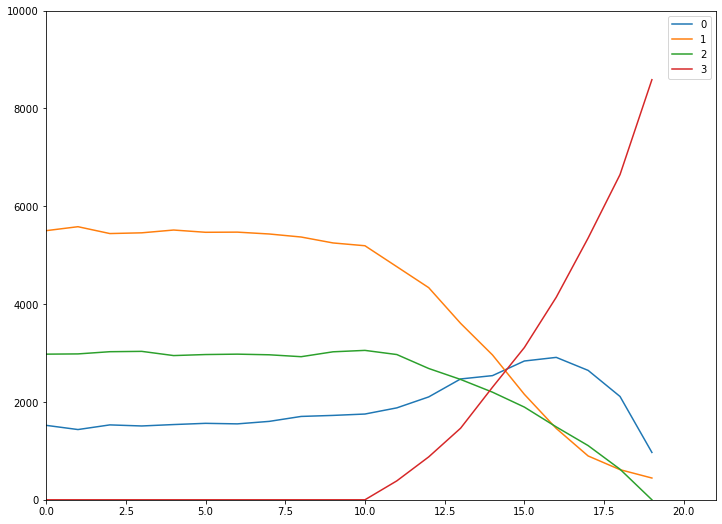

In [23]:
results_df_2.plot(kind="line", xlim =(0,21), ylim=(0,10000), figsize = (12, 9));

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot

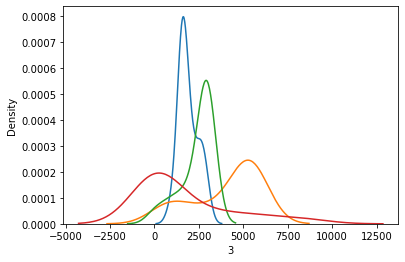

In [24]:
sns.distplot(results_df_2[0], hist=False);
sns.distplot(results_df_2[1], hist=False);
sns.distplot(results_df_2[2], hist=False);
sns.distplot(results_df_2[3], hist=False);

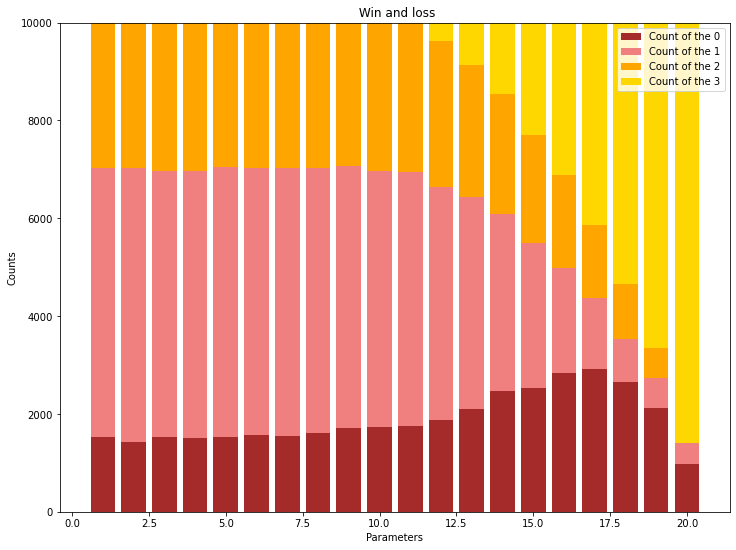

In [31]:
x = [i for i in range(1,21)]

plt.figure(figsize =(12, 9))

y1 = results_df_2[0]
y2 = results_df_2[1]
y3 = results_df_2[2]
y4 = results_df_2[3]

plt.bar(x, y1, color='brown')
plt.bar(x, y2, bottom=y1, color='lightcoral')
plt.bar(x, y3, bottom=y1+y2, color='orange')
plt.bar(x, y4, bottom=y1+y2+y3, color='gold')
plt.xlabel("Parameters")
plt.ylabel("Counts")
plt.legend(["Count of the 0", "Count of the 1", "Count of the 2", "Count of the 3"])
plt.title(" Win and loss")
plt.show();

In [33]:
results_df_2["count_win"] = results_df_2[0] + results_df_2[2]
results_df_2["count_loss"] = results_df_2[1] + results_df_2[3]

In [34]:
results_df_2

,0,1,2,3,count_win,count_loss
0,1522,5501,2977,0,4499,5501
1,1436,5582,2982,0,4418,5582
2,1531,5442,3027,0,4558,5442
3,1509,5457,3034,0,4543,5457
4,1538,5514,2948,0,4486,5514
5,1563,5468,2969,0,4532,5468
6,1552,5471,2977,0,4529,5471
7,1603,5433,2964,0,4567,5433
8,1704,5371,2925,0,4629,5371
9,1725,5250,3025,0,4750,5250


In [36]:
print("max_win_count = ", results_df_2["count_win"].max())
print("min_win_count = ", results_df_2["count_win"].min())
print("max_loss_count = ", results_df_2["count_loss"].max())
print("min_loss_count = ", results_df_2["count_loss"].min())

max_win_count =  4930
min_win_count =  968
max_loss_count =  9032
min_loss_count =  5070


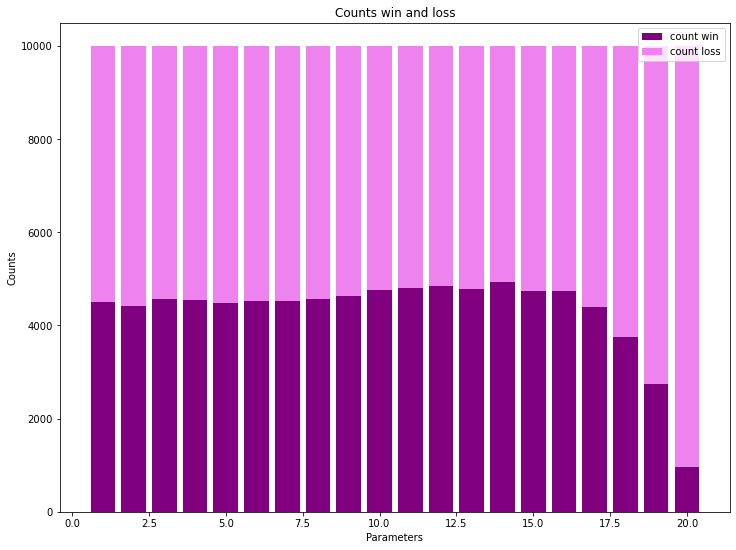

In [37]:
plt.figure(figsize =(12, 9))

y1 = results_df_2["count_win"]
y2 = results_df_2["count_loss"]

plt.bar(x, y1, color='purple')
plt.bar(x, y2, bottom=y1, color='violet')
plt.xlabel("Parameters")
plt.ylabel("Counts")
plt.legend(["count win", "count loss"])
plt.title("Counts win and loss")
plt.show();

Ինչպես երևում է գրաֆիկից ամենաշատ թվով հաղթանակները գրանցվել է, երբ մեր պարամետրի արժեքը 14 է եղել, թվով 4930 հաղթանակ։

Իսկ ամենաշատ թվով պարտությունները եղել է պարամետրի 20  արժեքի ժամանակ, թվով 9032 պարտություն։

5. Visualize the results (optional, additional points)

In [49]:
def wins_probability(arr):
    win_count = 0
    wins = []
    for i in range(1, len(arr) + 1):
        if arr[i-1] == 0 or arr[i-1] == 2:
            win_count +=1
        wins.append(win_count/i)
    return wins

In [59]:
x = [i for i in range(1, 10001)]

In [76]:
y = {}
for i in range(1, 21):
    y[i] = wins_probability(results_df[i])   

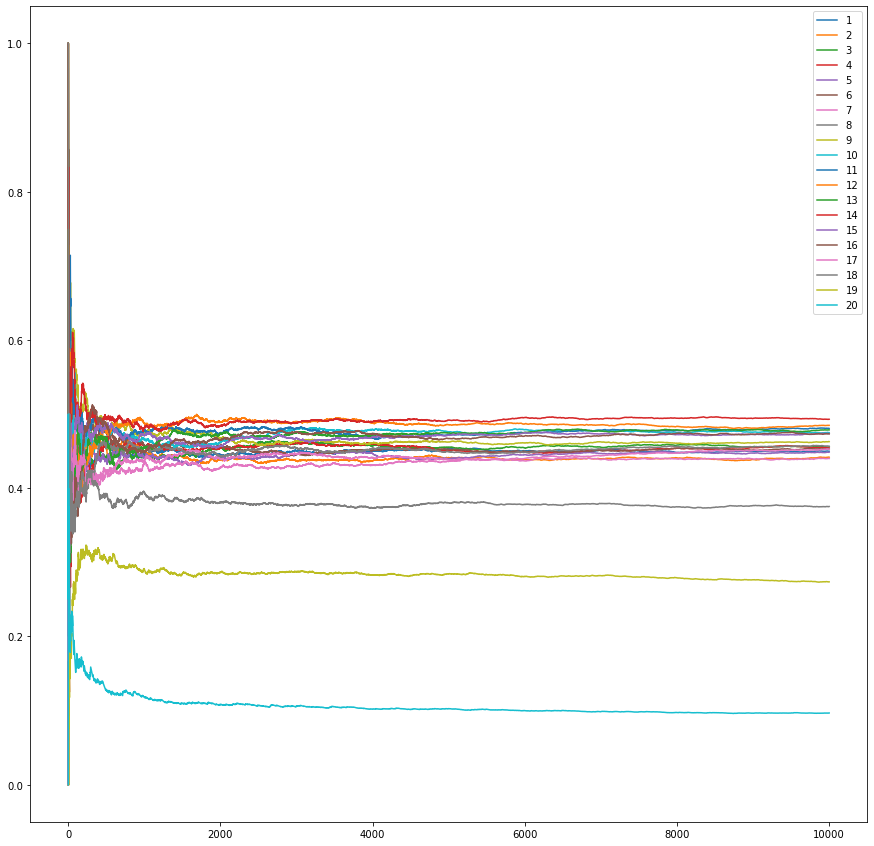

In [77]:
prob_df = pd.DataFrame(data=y)

fig = plt.figure(figsize = (15, 15))
ax = fig.gca()
prob_df.plot(ax=ax)
plt.show()

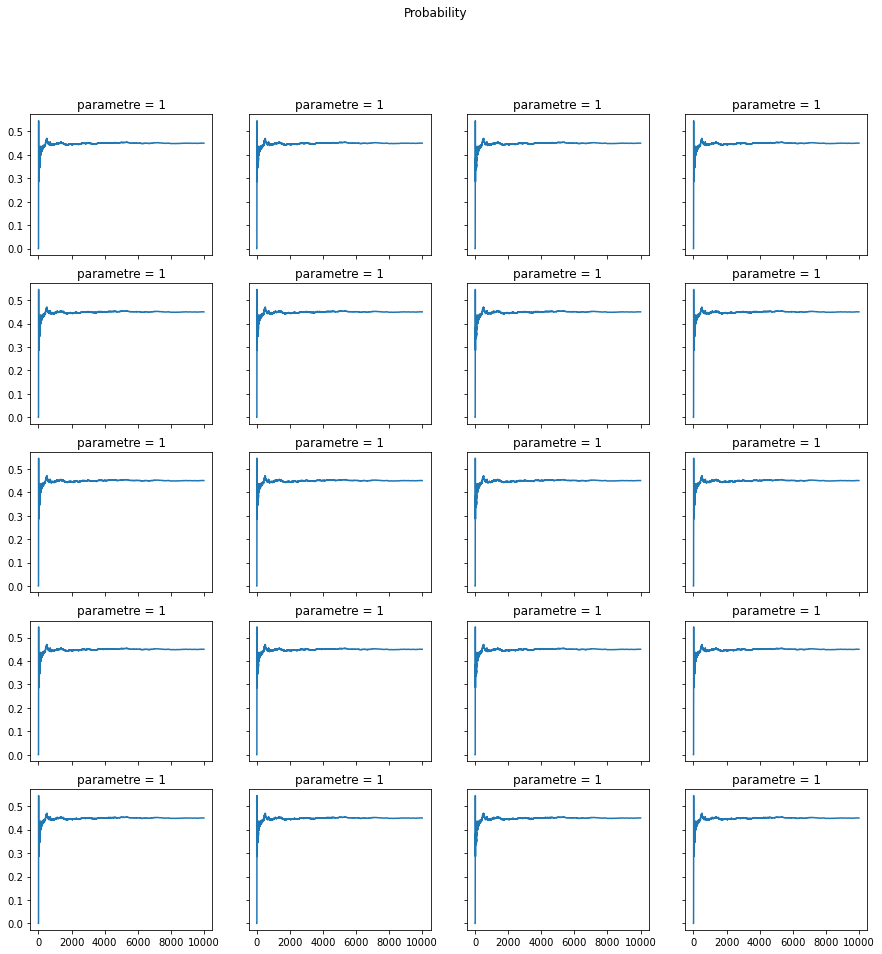

In [107]:
fig, ax = plt.subplots(5, 4, figsize=(15, 15))
fig.suptitle('Probability')

p = 1
for i in range(5):
    for j in range(4):
        ax[i, j].plot(x, y[p])
        ax[i, j].set_title(f"parametre = {p}")
        k += 1
for ax in fig.get_axes():
    ax.label_outer()

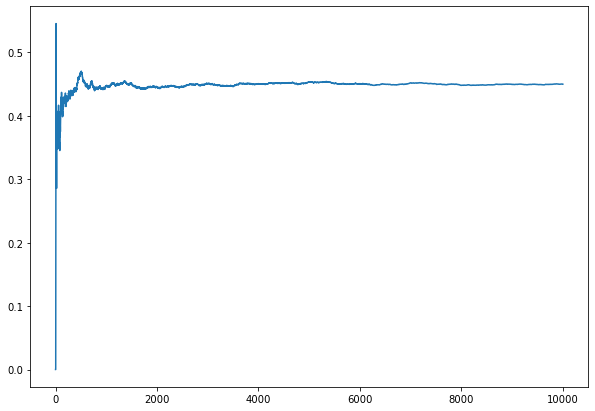

In [86]:
plt.figure(figsize = (10,7))
plt.plot(x, y[1]);

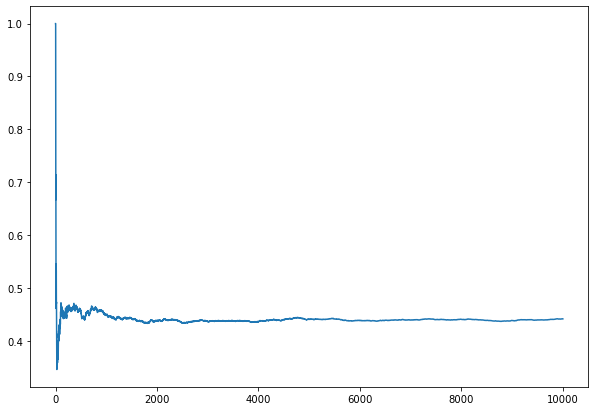

In [87]:
plt.figure(figsize = (10,7))
plt.plot(x, y[2]);

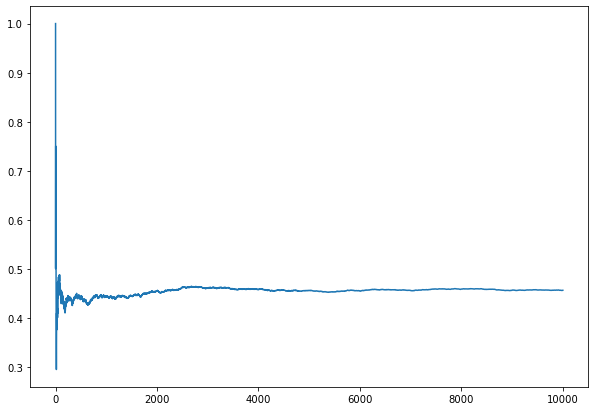

In [88]:
plt.figure(figsize = (10,7))
plt.plot(x, y[3]);

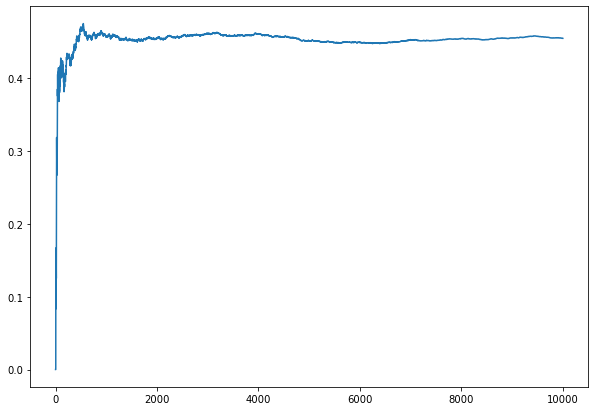

In [89]:
plt.figure(figsize = (10,7))
plt.plot(x, y[4]);

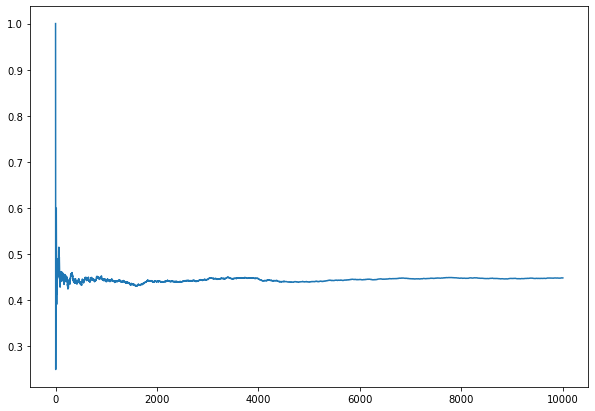

In [90]:
plt.figure(figsize = (10,7))
plt.plot(x, y[5]);

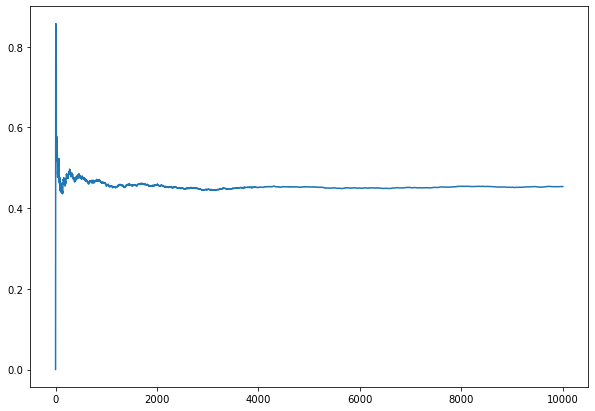

In [91]:
plt.figure(figsize = (10,7))
plt.plot(x, y[6]);

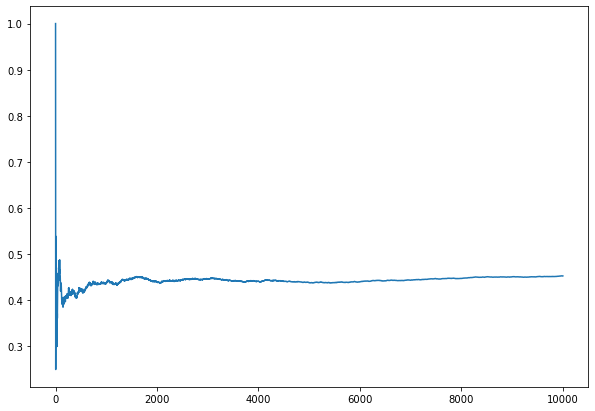

In [92]:
plt.figure(figsize = (10,7))
plt.plot(x, y[7]);

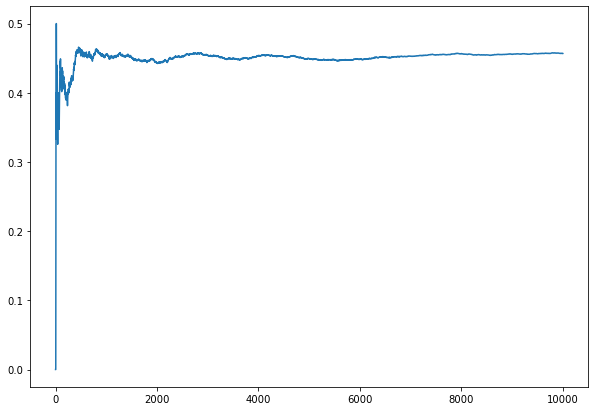

In [93]:
plt.figure(figsize = (10,7))
plt.plot(x, y[8]);

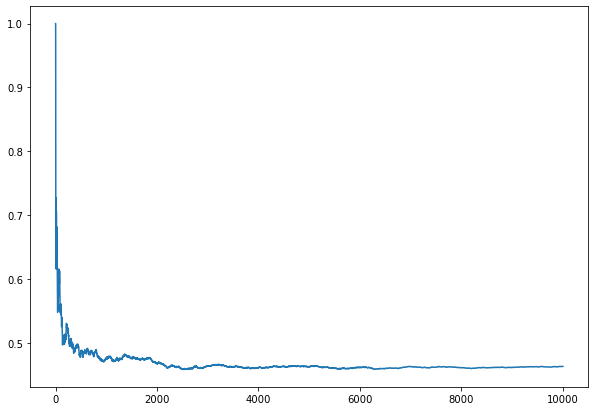

In [94]:
plt.figure(figsize = (10,7))
plt.plot(x, y[9]);

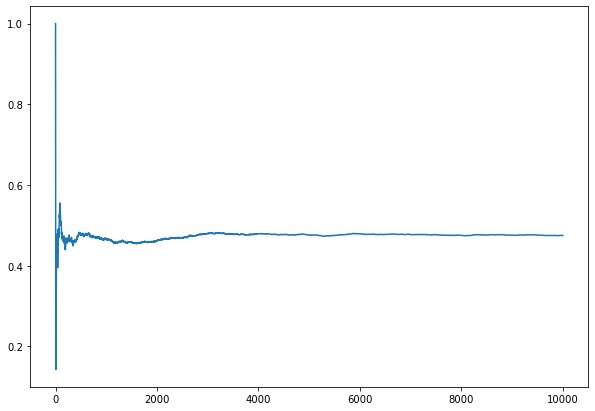

In [95]:
plt.figure(figsize = (10,7))
plt.plot(x, y[10]);

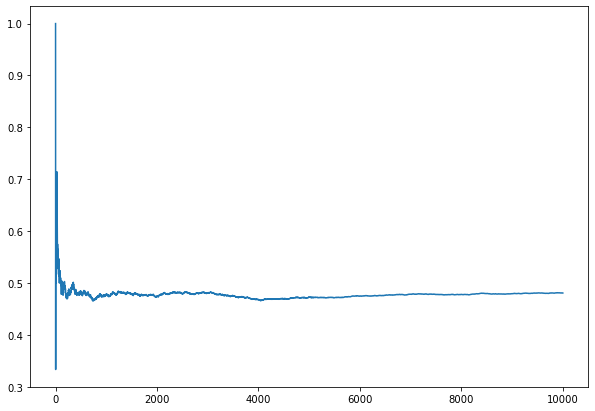

In [96]:
plt.figure(figsize = (10,7))
plt.plot(x, y[11]);

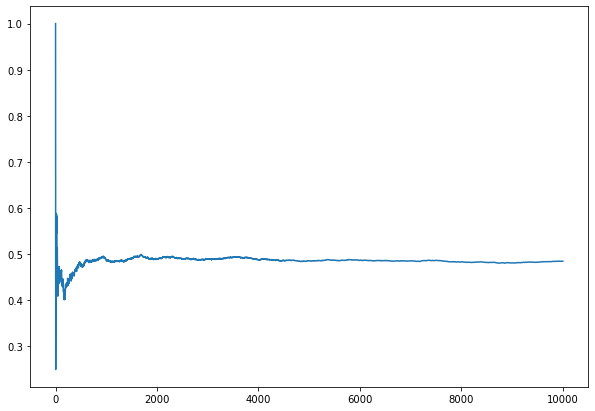

In [97]:
plt.figure(figsize = (10,7))
plt.plot(x, y[12]);

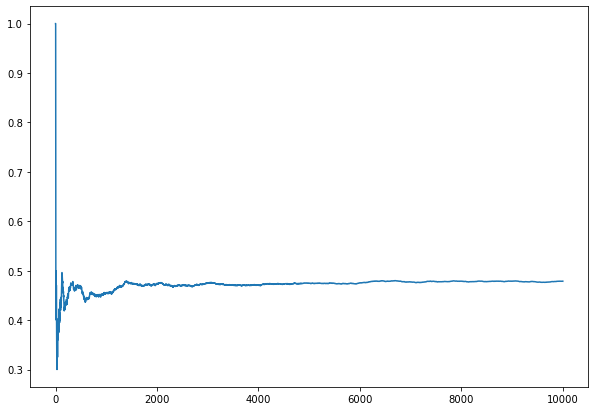

In [98]:
plt.figure(figsize = (10,7))
plt.plot(x, y[13]);

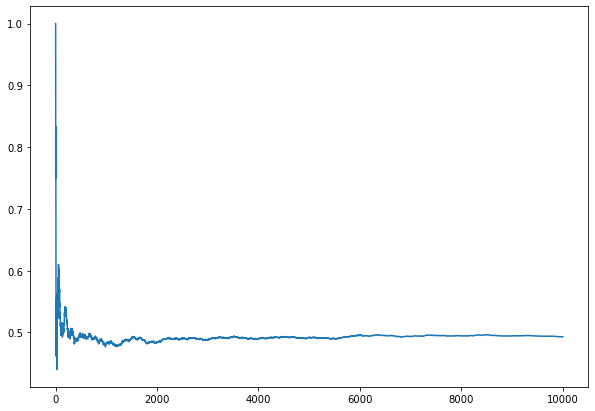

In [99]:
plt.figure(figsize = (10,7))
plt.plot(x, y[14]);

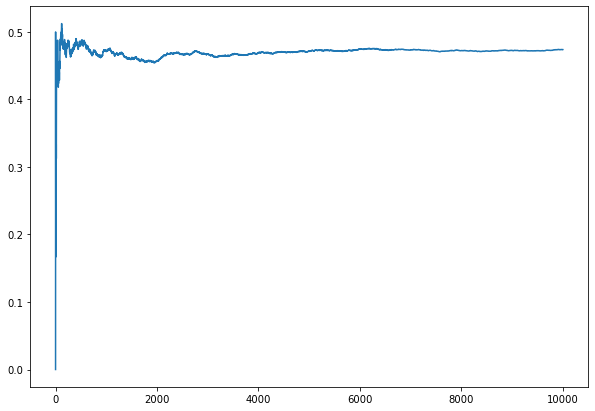

In [100]:
plt.figure(figsize = (10,7))
plt.plot(x, y[15]);

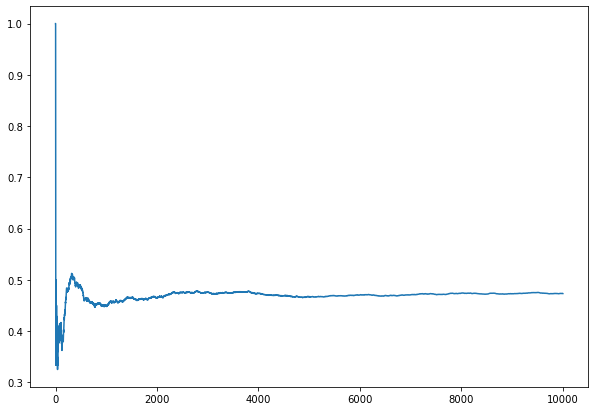

In [101]:
plt.figure(figsize = (10,7))
plt.plot(x, y[16]);

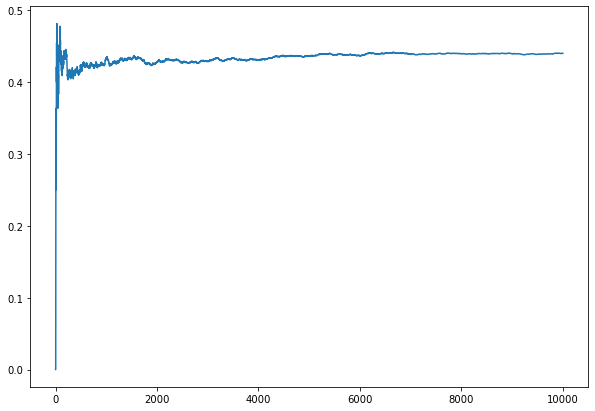

In [102]:
plt.figure(figsize = (10,7))
plt.plot(x, y[17]);

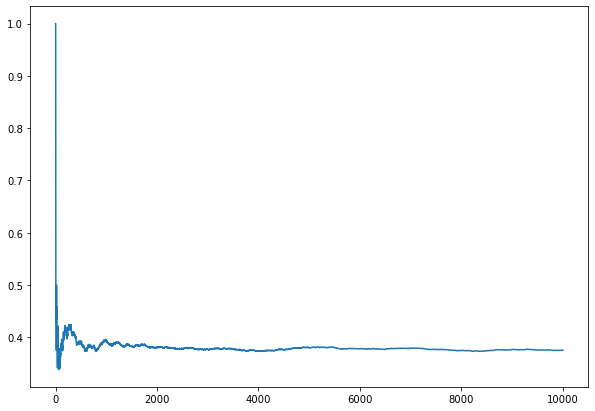

In [103]:
plt.figure(figsize = (10,7))
plt.plot(x, y[18]);

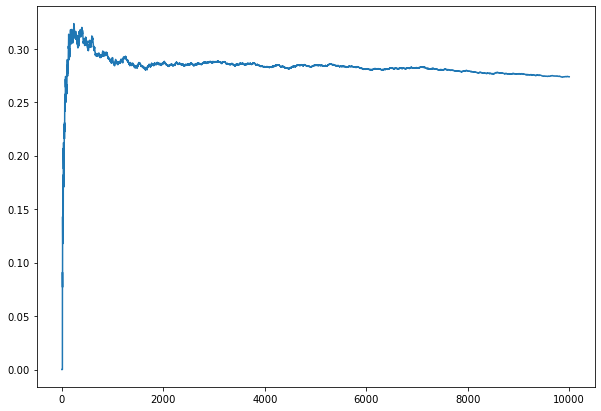

In [104]:
plt.figure(figsize = (10,7))
plt.plot(x, y[19]);

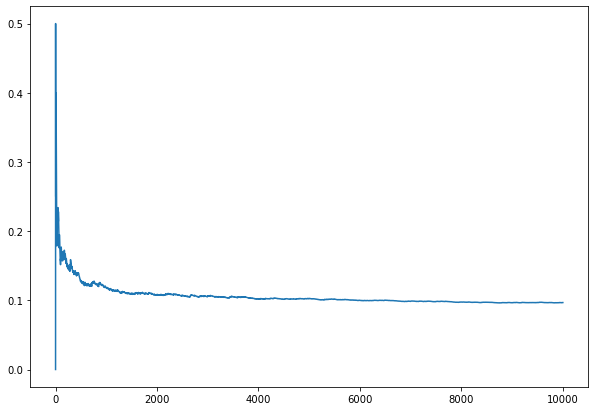

In [105]:
plt.figure(figsize = (10,7))
plt.plot(x, y[20]);